In [1]:
#To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

#- Import data into Python environment.
#- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
#- Provide a table with the frequency of complaint types.

#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

#Which state has the maximum complaints
#Which state has the highest percentage of unresolved complaints
#- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('F:\Datascience\Simplilearn\5) Python for Data Science\Customer service Database\Project 4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comcast-telecom-consumer-complaints/Comcast_telecom_complaints_data.csv
/kaggle/input/comcast-telecom-consumer-complaints/Comcast Telecom Complaints data.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## - Import data into Python environment.

comcast_df=pd.read_csv("../input/comcast-telecom-consumer-complaints/Comcast_telecom_complaints_data.csv")

In [5]:
comcast_df.head(3)  ##  data view

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [6]:
comcast_df.describe()  ## Discribtion

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


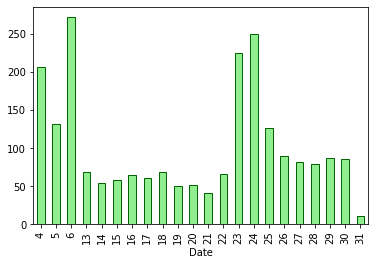

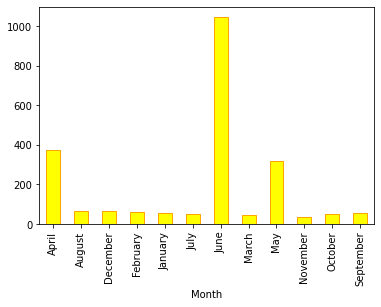

In [7]:
## - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

comcast_df['Month']=pd.to_datetime(comcast_df['Date_month_year']).dt.month_name()
comcast_df['Date']=pd.to_datetime(comcast_df['Date_month_year']).dt.day

## Graph for date wise
comcast_df.groupby(['Date'])['Customer Complaint'].count().plot(kind='bar',color="lightgreen",edgecolor="darkgreen",)
plt.show()

## Graph for month wise
comcast_df.groupby(['Month'])['Customer Complaint'].count().plot(kind='bar',color="yellow",edgecolor="orange")
plt.show()

In [8]:
## - Provide a table with the frequency of complaint types.

comcast_df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Data Caps,11
...,...,...
1836,double billing after change of service,1
1837,Comcast Does Not Deliver Service,1
1838,Possible Speed Throttling: Comcast Xfinity Ric...,1
1839,Billing Over Charges,1


In [9]:
## - Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
comcast_df['Customer Complaint'].value_counts().head(5)

Comcast             83
Comcast Internet    18
Comcast Data Cap    17
comcast             13
Data Caps           11
Name: Customer Complaint, dtype: int64

In [10]:
## - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and 
## Closed & Solved is to be categorized as Closed.

comcast_df['Status']=comcast_df['Status'].apply(lambda x: 'Open' if ((x=='Open') | (x=='Pending')) else 'Closed')

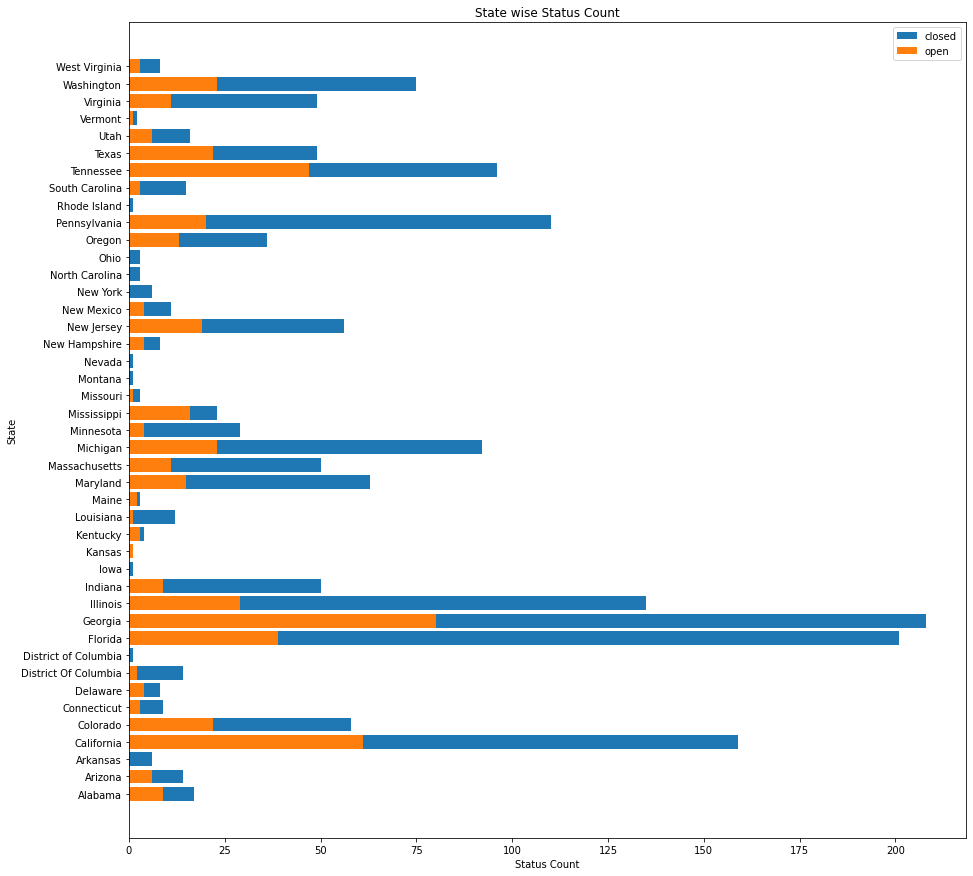

In [11]:
## - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
opn=comcast_df[comcast_df['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
clos=comcast_df[comcast_df['Status']=='Closed'].groupby(['State'])['Status'].count().to_frame().reset_index()

fig=plt.figure(figsize=(15,15))
plt.barh(clos.State, clos.Status)
plt.barh(opn.State, opn.Status)
plt.ylabel("State")
plt.xlabel("Status Count")
plt.legend(["closed", "open"])
plt.title("State wise Status Count")

plt.show()


In [12]:
## Which state has the maximum complaints

comcast_df.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

In [13]:
## Which state has the highest percentage of unresolved complaints

State_Unsolved=comcast_df.loc[comcast_df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State  
Georgia    15.473888
dtype: float64

In [14]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
comcast_df[comcast_df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64

In [15]:
# Thank You.